In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [66]:
os.getcwd()

'/home/sam/tbi_ct_lesion_segmentation'

In [67]:
#results_dir = "results"
results_dir = os.path.join("..", "nihvandy", "ct_seg", "vu_results", "results")

In [68]:
os.listdir(results_dir)

['nih_weights', 'vu_weights', 'multi_weights']

In [69]:
training_patterns = [os.path.join(results_dir, x) for x in os.listdir(results_dir)
                    if not os.path.isdir(x)]

In [70]:
training_patterns

['../nihvandy/ct_seg/vu_results/results/nih_weights',
 '../nihvandy/ct_seg/vu_results/results/vu_weights',
 '../nihvandy/ct_seg/vu_results/results/multi_weights']

In [71]:
result_files = [[os.path.join(training_pattern, x) for x in os.listdir(training_pattern) if "result" in x]
               for training_pattern in training_patterns]
result_files

[['../nihvandy/ct_seg/vu_results/results/nih_weights/result_nih_2018-07-16_16-51-46_epoch_0222_val_dice_coef_0.9707_weights.csv'],
 ['../nihvandy/ct_seg/vu_results/results/vu_weights/result_vu_2018-07-19_10-22-02_epoch_0238_val_dice_coef_0.9656_weights.csv'],
 ['../nihvandy/ct_seg/vu_results/results/multi_weights/result_multisite_2018-07-23_01:48:27_val_dice_coef_0.9655_weights.csv']]

In [77]:
nih_results = [x[0] for x in result_files if "nih_weights" in x[0]][0]
vu_results = [x[0] for x in result_files if "vu_weights" in x[0]][0]
multi_results = [x[0] for x in result_files if "multi_weights" in x[0]][0]

In [78]:
nih_df = pd.read_csv(nih_results)
vu_df = pd.read_csv(vu_results)
multi_df = pd.read_csv(multi_results)

In [79]:
nih_df = nih_df.assign(weight_site="nih")
vu_df = vu_df.assign(weight_site="vu")
multi_df = multi_df.assign(weight_site="multi")

In [80]:
merged = pd.concat([nih_df, vu_df, multi_df], keys=['nih', 'vu', 'multi'])

In [81]:
merged

filename      dice  thresholded volume(mm)  \
nih   0  CQS_TBI10071_CT.nii.gz  0.817201            35989.801549   
      1  CQS_TBI10346_CT.nii.gz  0.805213            46158.073655   
      2  CQS_TBI10880_CT.nii.gz  0.628441            32184.559097   
      3  CQS_TBI11365_CT.nii.gz  0.660849            57380.815086   
      4  CQS_TBI12874_CT.nii.gz  0.786718            69008.811074   
      5  CQS_TBI13819_CT.nii.gz  0.680342            52043.107325   
      6  CQS_TBI14468_CT.nii.gz  0.574633            53370.535097   
      7  CQS_TBI15110_CT.nii.gz  0.563539            58869.005264   
vu    0  CQS_TBI10071_CT.nii.gz  0.827504            34435.986045   
      1  CQS_TBI10346_CT.nii.gz  0.805223            46549.629859   
      2  CQS_TBI10880_CT.nii.gz  0.738406            27264.862289   
      3  CQS_TBI11365_CT.nii.gz  0.758664            62596.591508   
      4  CQS_TBI12874_CT.nii.gz  0.816920            64502.077257   
      5  CQS_TBI13819_CT.nii.gz  0.727084            50807.237450   
      6  CQS_TBI14468_CT.nii.gz  0.640037            56889.130749   
      7  CQS_TBI15110_CT.nii.gz  0.644497            51959.798374   
multi 0  CQS_TBI10071_CT.nii.gz  0.848872            37142.006986   
      1  CQS_TBI10346_CT.nii.gz  0.821743            43627.734035   
      2  CQS_TBI10880_CT.nii.gz  0.662095            23947.720184   
      3  CQS_TBI11365_CT.nii.gz  0.674920            56289.648471   
      4  CQS_TBI12874_CT.nii.gz  0.795565            65259.560856   
      5  CQS_TBI13819_CT.nii.gz  0.730316            46518.634650   
      6  CQS_TBI14468_CT.nii.gz  0.639372            48300.383873   
      7  CQS_TBI15110_CT.nii.gz  0.625542            59705.720119   

         thresholded volume ground truth(mm)  \
nih   0                         34621.557593   
      1                         38196.430839   
      2                         25183.976669   
      3                         76481.080487   
      4                         69447.740524   
      5                         37141.024195   
      6                         29943.410226   
      7                         49917.515247   
vu    0                         34621.557593   
      1                         38196.430839   
      2                         25183.976669   
      3                         76481.080487   
      4                         69447.740524   
      5                         37141.024195   
      6                         29943.410226   
      7                         49917.515247   
multi 0                         34621.557593   
      1                         38196.430839   
      2                         25183.976669   
      3                         76481.080487   
      4                         69447.740524   
      5                         37141.024195   
      6                         29943.410226   
      7                         49917.515247   

         largest hematoma ground truth(mm)  largest hematoma prediction(mm)  \
nih   0                       32484.715059                     31272.960543   
      1                       31019.131740                     28661.175353   
      2                       23815.229340                     18260.355835   
      3                       76008.241620                     48038.004043   
      4                       64474.185419                     58023.830894   
      5                       37141.024195                     32814.360185   
      6                       29943.410226                     24230.808333   
      7                       32330.972618                     19712.303108   
vu    0                       32484.715059                     29626.359264   
      1                       31019.131740                     28751.060897   
      2                       23815.229340                     19669.045258   
      3                       76008.241620                     59752.283864   
      4                       64474.185419                     54116.

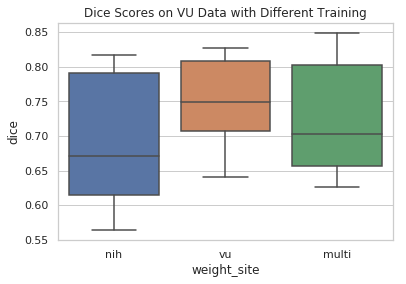

In [87]:
ax = sns.boxplot(x="weight_site", y="dice", data=merged
                ).set_title("Dice Scores on VU Data with Different Training"
                )
fig = ax.get_figure()
#fig.savefig("vu_data_boxplog.png")
fig.savefig("vu_data_boxplot.png")

In [83]:
# This will be the best way to show the Dice scores as a box plot in the end
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
#                 data=tips, palette="Set3")

In [84]:
from scipy.stats import wilcoxon

In [85]:
print("Wilcoxon between NIH weights, Multi weights")
print(wilcoxon(nih_df['dice'], multi_df['dice']))

Wilcoxon between NIH weights, Multi weights
WilcoxonResult(statistic=0.0, pvalue=0.011718685599768628)


/home/sam/miniconda3/envs/tf/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [86]:
print("Wilcoxon between VU weights, Multi weights")
print(wilcoxon(vu_df['dice'], multi_df['dice']))

Wilcoxon between VU weights, Multi weights
WilcoxonResult(statistic=11.0, pvalue=0.32698934959801507)


/home/sam/miniconda3/envs/tf/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
